# Project: Wrangling and Analyze Data

## Table of Contents
<ol>
    <li><a href='#gathering'>Data Gathering</a></li>
    <li>
        <a href='#assessing'>Assessing</a>
        <ul>
            <li><a href='#quality'>Quality Issues</a></li>
            <li><a href='#tidy'>Tidiness Issues</a></li>
        </ul>
    </li>
    <li><a href='#cleaning'>Data Cleaning</a></li>
    <li><a href='#storing'>Storing Data</a></li>
    <li><a href='#eda'>Analyzing and Visualizing the Data</a></li>
</ol>

<a id='gathering'></a>
## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [158]:
import numpy as np
import pandas as pd

In [159]:
twitterData = pd.read_csv('assets/twitter-archive-enhanced.csv')
twitterData

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [160]:
# import libraries required for the file download
import requests
import os


In [161]:
# Make directory if it doesn't already exist
folder = 'assets'
if not os.path.exists(folder):
    os.makedirs(folder)

In [162]:
# store download link into the url string
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [163]:
# get the name of the image-prediction file from the last segment of the download link
imagePredFileName = (url.split('/')[-1])

In [164]:
# check if the image prediction file exists in the assets folder
# if it doesn't exist, download the file from the link address stored in url
# and then save the file into the assets folder
if not os.path.exists(folder+'/'+imagePredFileName):
    response = requests.get(url)
    with open(os.path.join(folder, imagePredFileName), mode = 'wb') as file:
        file.write(response.content)


In [165]:
imagePred = pd.read_table(folder+'/'+imagePredFileName)
imagePred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [166]:
# import modules that will be used for downloading the tweet data 
import tweepy
from tweepy import OAuthHandler
import json
import time
from timeit import default_timer as timer

In [167]:
consumer_key = '*****'
consumer_secret = '*****'
access_token = '*****'
access_secret = '*****'

In [168]:
# create twitter api object and create objects to store 
# the tweet ids and the name for the text file that holds 
# the data obtained using the Twitter API 

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [169]:
tweet_ids = twitterData.tweet_id.values
jsonFile = 'tweet_json.txt'

In [170]:
toRetry = []

In [171]:
# check if the tweet_json file has already been downloaded, 
# if it hasn't been downloaded, create a new text file and
# dump the json data into the text file

if not os.path.exists(folder+'/'+jsonFile):
    count = 0
    fails_dict = {}
    start = timer()
    with open(os.path.join(folder, jsonFile), 'w') as outfile:
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.errors.NotFound as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
            except tweepy.errors.Forbidden:
                print('Time limit reached, waiting for 1 min before continuing')
                time.sleep(60)
                toRetry.append(tweet_id)
                pass
            except tweepy.errors.TweepyException:
                print('Bad network, waiting 1 min for better network connection')
                time.sleep(60)
                toRetry.append(tweet_id)
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

In [172]:
# check if any tweet_id has been inserted into toRetry list
toRetry

[]

In [173]:
# retry to get the tweet data if any tweet_id has been placed into toRetry
if len(toRetry) > 0:
    count = 0
    with open(os.path.join(folder, jsonFile), 'a') as outfile:
        for tweet_id in toRetry:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.errors.NotFound as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
            except tweepy.errors.Forbidden:
                print('Time limit reached, waiting for 1 min before continuing')
                time.sleep(60)
                pass

In [174]:
# read json file and store it in a variable
tweetJson = pd.read_json(folder+'/'+jsonFile, lines=True)
tweetJson

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2323,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2324,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2325,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


<a id='assessing'></a>
## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Twitter Archive Table:

In [175]:
# check the top columns
twitterData.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [176]:
# visually assess random entries in the table
twitterData.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2193,668902994700836864,NaN,NaN,2015-11-23 21:24:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lambeau. He's a Whistling Haiku from the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668902994...,11,10,Lambeau,None,None,None,None
688,787810552592695296,NaN,NaN,2016-10-17 00:20:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Frank. He wears sunglasses and walks h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/787810552...,11,10,Frank,None,None,None,None
123,868880397819494401,NaN,NaN,2017-05-28 17:23:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Walter. He won't start hydrotherapy wi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
1277,709042156699303936,NaN,NaN,2016-03-13 15:43:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Klevin. He's addicted to sandwiches (y...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709042156...,9,10,Klevin,None,None,None,None
50,882627270321602560,NaN,NaN,2017-07-05 15:48:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Stanley. He has his first swim lesson ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/882627270...,13,10,Stanley,None,None,None,None


In [177]:
twitterData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [178]:
# check for duplicate entries
twitterData.duplicated().any()

False

In [179]:
# check number of unique elements in each column 
twitterData.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [180]:
# check if any entry has its rating numerator less than zero
twitterData[twitterData.rating_numerator < 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [181]:
# check if any entry has its rating_denominator denominator not equal to 10
twitterData[twitterData.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [182]:
# check the retweets
twitterData[twitterData.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


### Tweet Image Prediction Table:

In [183]:
# check the top columns
imagePred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [184]:
# visually assess random entries in the table
imagePred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
221,670093938074779648,https://pbs.twimg.com/media/CUym4Y5WsAEiI9_.jpg,1,toy_poodle,0.383346,True,miniature_poodle,0.153678,True,chow,0.138543,True
73,667369227918143488,https://pbs.twimg.com/media/CUL4xR9UkAEdlJ6.jpg,1,teddy,0.709545,False,bath_towel,0.127285,False,Christmas_stocking,0.028567,False
397,673662677122719744,https://pbs.twimg.com/media/CVlUfBbUwAQyfcD.jpg,1,Labrador_retriever,0.957670,True,beagle,0.012413,True,golden_retriever,0.005689,True
1517,787322443945877504,https://pbs.twimg.com/media/Cu0hlfwWYAEdnXO.jpg,1,seat_belt,0.747739,False,golden_retriever,0.105703,True,dingo,0.017257,False
1471,779377524342161408,https://pbs.twimg.com/ext_tw_video_thumb/77937...,1,sundial,0.170921,False,cash_machine,0.060359,False,maze,0.054981,False


In [185]:
imagePred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [186]:
# check for duplicate entries
imagePred.duplicated().any()

False

In [187]:
# check number of unique elements in each column 
imagePred.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [188]:
# check dog images that were successfully predicted for(ie entries that had at least one true value in the entries for p1_dog, p2_dog or p3_dog)
imagePred[imagePred.p1_dog | imagePred.p2_dog | imagePred.p3_dog]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


### Tweet Json Data Table

In [189]:
# check the top columns
tweetJson.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [190]:
# visually assess random table entries with the tablee displayed horizontally so as to go through all columns
tweetJson.sample(5).T

,1008,902,1962,1785,1057
created_at,2016-06-20 19:11:53+00:00,2016-07-17 01:05:25+00:00,2015-12-04 03:43:54+00:00,2015-12-15 04:19:18+00:00,2016-06-02 01:44:22+00:00
id,744971049620602880,754482103782404096,672622327801233409,676617503762681856,738184450748633089
id_str,744971049620602880,754482103782404096,672622327801233408,676617503762681856,738184450748633088
full_text,Say hello to Indie and Jupiter. They're having...,This is Milo. He's currently plotting his reve...,This lil pupper is sad because we haven't foun...,I promise this wasn't meant to be a cuteness o...,"For the last time, we only rate dogs. Pls stop..."
truncated,False,False,False,False,False
display_text_range,"[0, 98]","[0, 56]","[0, 128]","[0, 131]","[0, 116]"
entities,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions..."
extended_entities,"{'media': [{'id': 744971033824788481, 'id_str'...","{'media': [{'id': 754481405627957248, 'id_str'...","{'media': [{'id': 672622321664811010, 'id_str'...","{'media': [{'id': 676617499136409600, 'id_str'...","{'media': [{'id': 738184431987351552, 'id_str'..."
source,"<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r...","<a href=""http://twitter.com/download/iphone"" r..."
in_reply_to_status_id,NaN,NaN,NaN,NaN,NaN


In [191]:
tweetJson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2327 non-null   datetime64[ns, UTC]
 1   id                             2327 non-null   int64              
 2   id_str                         2327 non-null   int64              
 3   full_text                      2327 non-null   object             
 4   truncated                      2327 non-null   bool               
 5   display_text_range             2327 non-null   object             
 6   entities                       2327 non-null   object             
 7   extended_entities              2057 non-null   object             
 8   source                         2327 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

In [192]:
tweetJson[tweetJson.place.notnull()].place

834    {'id': '7356b662670b2c31', 'url': 'https://api...
Name: place, dtype: object

In [193]:
print(tweetJson.place[834])

{'id': '7356b662670b2c31', 'url': 'https://api.twitter.com/1.1/geo/id/7356b662670b2c31.json', 'place_type': 'city', 'name': 'Clifton', 'full_name': 'Clifton, NJ', 'country_code': 'US', 'country': 'United States', 'contained_within': [], 'bounding_box': {'type': 'Polygon', 'coordinates': [[[-74.1977277, 40.82028], [-74.118533, 40.82028], [-74.118533, 40.899384], [-74.1977277, 40.899384]]]}, 'attributes': {}}


In [194]:
# check number of unique elements in lang column 
tweetJson.lang.unique()

array(['en', 'und', 'in', 'eu', 'es', 'nl', 'tl', 'ro', 'et'],
      dtype=object)

In [195]:
# check number of unique elements in possibly_sensitive column 
tweetJson.possibly_sensitive.unique()

array([ 0., nan])

In [196]:
# check number of unique elements in possibly_sensitive_appealable column 
tweetJson.possibly_sensitive_appealable.unique()

array([ 0., nan])

In [197]:
# check number of unique elements in favorited column 
tweetJson.favorited.unique()

array([False])

In [198]:
# check number of unique elements in retweeted column 
tweetJson.retweeted.unique()

array([False])

In [199]:
# check number of unique elements in is_quote_status column 
tweetJson.is_quote_status.unique()

array([False,  True])

In [200]:
# check number of unique elements in is_quote_status column 
tweetJson.is_quote_status.value_counts()

False    2296
True       31
Name: is_quote_status, dtype: int64

<a id='quality'></a>
### Quality issues

<ol>
    <li>Across all tables, some columns here contain very little data or no data at all</li>
    <p><b>Twitter archive table:</b></p>
    <li>Some entries have the denominator rating not equal to 10</li>
    <li>Some of the entries in the table are retweets which are not to be included in the analysis</li>
    <p><b>Image Prediction Table:</b></p>
    <li>Some entries for the table were not predicted to be a dog</li>
    <p><b>Tweet Json Table:</b></p>
    <li>Some of values of the lang column are ambiguous</li>
    <li>Some columns have unhashable datatypes such as lists and dicts</li>
    <li>The 'in' of the lang column is invalid as there is no language code as 'in'</li>
    <li>Some column names are inconsistent with the column names in the Twitter archive table</li>
</ol>

<a id='tidy'></a>
### Tidiness issues
<ol>
    <li>Across all the tables, some of the columns are not needed for the analysis to be made</li>
    <p><b>Twitter archive table:</b></p>
    <li>The source column contains categorical data which can be better expressed by more descriptive names
    </li>
    <li>Since the data across all 3 tables will be merged, the timestamp column could be dropped since it is represented by the created_at column of the tweet json data table
    </li>
   <p><b>Tweet Json Table:</b></p>
        <li>The column for created at contains two variable - date and time</li>
</ol>

<a id='cleaning'></a>
## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

### Twitter Archive Table:

In [201]:
# making a copy of the twitter archive table
twitterData_clean = twitterData.copy()
twitterData_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


# Issue #1: Entries which are retweets

#### Define: 
The entries which are retweets(that is their retweeted_status_id is a non-null value) are dropped 

#### Code:

In [202]:
twitterData_clean = twitterData_clean[twitterData_clean.retweeted_status_id.isnull()]

#### Test

In [203]:
twitterData_clean[twitterData_clean.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #2: Missing Entries in Columns

#### Define:
Remove the columns for in_reply_to_status_id, retweeted_status_id,in_reply_to_user_id, retweeted_status_timestamp, retweeted_status_user_id, text and expanded_urls

#### Code

In [204]:
twitterData_clean.drop(['in_reply_to_status_id', 'retweeted_status_id', 
                                      'in_reply_to_user_id', 'retweeted_status_timestamp', 
                                      'retweeted_status_user_id', 'text', 'expanded_urls'], axis='columns', inplace=True)

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Test

In [205]:
twitterData_clean

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",9,10,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",7,10,a,None,None,None,None


### Issue #3: Source Column Values

#### Define:
Change the names of the values in the source column to more descriptive names that are categorical.

#### Code

In [206]:
# check for the number of unique source values
twitterData_clean.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [207]:
# function to rename the source column entries into the last segments of the entry
def changeSource(strin):
    return strin[strin.index('>')+1:-4]

In [208]:
# apply the above function to the source column
twitterData_clean.source = twitterData_clean.source.apply(changeSource)

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


#### Test

In [209]:
# check if required changes have been made
twitterData_clean.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

In [210]:
twitterData_clean

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,Twitter for iPhone,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52 +0000,Twitter for iPhone,6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54 +0000,Twitter for iPhone,9,10,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30 +0000,Twitter for iPhone,7,10,a,None,None,None,None


### Issue #4: Timestamp Column Redundance

#### Define:
The timestamp column is dropped to avoid columns with redundant data

#### Code

In [211]:
# drop the timestamp column
twitterData_clean.drop('timestamp', axis='columns', inplace=True)

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Test

In [212]:
# check the table
twitterData_clean

,tweet_id,source,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,Twitter for iPhone,13,10,Phineas,None,None,None,None
1,892177421306343426,Twitter for iPhone,13,10,Tilly,None,None,None,None
2,891815181378084864,Twitter for iPhone,12,10,Archie,None,None,None,None
3,891689557279858688,Twitter for iPhone,13,10,Darla,None,None,None,None
4,891327558926688256,Twitter for iPhone,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,Twitter for iPhone,5,10,None,None,None,None,None
2352,666044226329800704,Twitter for iPhone,6,10,a,None,None,None,None
2353,666033412701032449,Twitter for iPhone,9,10,a,None,None,None,None
2354,666029285002620928,Twitter for iPhone,7,10,a,None,None,None,None


### Issue #5: Dog Classification

#### Define:
The values for the dog labels(doggo, floofer, puppo, pupper) are changed to booleans.

#### Code:

In [213]:
# function that checks the entry on the dog label columns and returns true of the value is not none
def defineDog(x):
    if x == 'None':
        return False
    else: 
        return True

In [214]:
# change the values of the dog label columns to boolean equivalents
twitterData_clean.doggo = twitterData_clean.doggo.apply(defineDog)
twitterData_clean.floofer = twitterData_clean.floofer.apply(defineDog)
twitterData_clean.pupper = twitterData_clean.pupper.apply(defineDog)
twitterData_clean.puppo = twitterData_clean.puppo.apply(defineDog)

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


#### Test

In [215]:
twitterData_clean

,tweet_id,source,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,Twitter for iPhone,13,10,Phineas,False,False,False,False
1,892177421306343426,Twitter for iPhone,13,10,Tilly,False,False,False,False
2,891815181378084864,Twitter for iPhone,12,10,Archie,False,False,False,False
3,891689557279858688,Twitter for iPhone,13,10,Darla,False,False,False,False
4,891327558926688256,Twitter for iPhone,12,10,Franklin,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,Twitter for iPhone,5,10,None,False,False,False,False
2352,666044226329800704,Twitter for iPhone,6,10,a,False,False,False,False
2353,666033412701032449,Twitter for iPhone,9,10,a,False,False,False,False
2354,666029285002620928,Twitter for iPhone,7,10,a,False,False,False,False


### Issue #6 : Rating Denominators greater than 10

#### Define:
Drop entries whose rating denominators are not 10

#### Code:

In [216]:
# make twitter data contain only entries with rating_denominator equal to 10
twitterData_clean = twitterData_clean[twitterData_clean.rating_denominator == 10]

#### Test

In [217]:
# check table
twitterData_clean.shape

(2153, 9)

In [218]:
twitterData_clean

,tweet_id,source,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,Twitter for iPhone,13,10,Phineas,False,False,False,False
1,892177421306343426,Twitter for iPhone,13,10,Tilly,False,False,False,False
2,891815181378084864,Twitter for iPhone,12,10,Archie,False,False,False,False
3,891689557279858688,Twitter for iPhone,13,10,Darla,False,False,False,False
4,891327558926688256,Twitter for iPhone,12,10,Franklin,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,Twitter for iPhone,5,10,None,False,False,False,False
2352,666044226329800704,Twitter for iPhone,6,10,a,False,False,False,False
2353,666033412701032449,Twitter for iPhone,9,10,a,False,False,False,False
2354,666029285002620928,Twitter for iPhone,7,10,a,False,False,False,False


### Image Prediction Table

In [219]:
# make a copy of the image prediction table
imagePred_clean = imagePred.copy()
imagePred_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


### Issue #7: Non-dog Predictions

#### Define:
The entries which do not have atleast a True value in either of the p1_dog, p2_dog or p3_dog are dropped

#### Code:

In [220]:
imagePred_clean = imagePred_clean[imagePred_clean.p1_dog | imagePred_clean.p2_dog | imagePred_clean.p3_dog]

#### Test:

In [221]:
imagePred_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True


### Issue #8: Dog breed Prediction

#### Define:
A new column should be created that stores the actual breed of the dog based on the highest probability

#### Code:

In [222]:
# function to get the actual breed of dog by checking
# the for the dog prediction that has the highest probability and then returns the name of that dog
def getDogBreed(x):
    trues = {}
    for dogName in ['p1', 'p2', 'p3']:
        if x['%s_dog' % dogName]:
            trues[x['%s_conf' % dogName]] = dogName
    maxPred = trues.get(max(trues))
    return x[maxPred]

In [223]:
imagePred_clean['pred_dog_breed'] = imagePred_clean.apply(getDogBreed, axis='columns')

/data/user/0/ru.iiec.pydroid3/cache/ipykernel_28821/2329412800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imagePred_clean['pred_dog_breed'] = imagePred_clean.apply(getDogBreed, axis='columns')


#### Test:

In [224]:
imagePred_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,pred_dog_breed
607,680055455951884288,https://pbs.twimg.com/media/CW-ZRC_WQAAyFrL.jpg,1,Samoyed,0.995466,True,Great_Pyrenees,0.001834,True,Pomeranian,0.000667,True,Samoyed
529,676811746707918848,https://pbs.twimg.com/media/CWSEsO9WwAAX-fZ.jpg,1,Chihuahua,0.440916,True,Pomeranian,0.345806,True,cocker_spaniel,0.060331,True,Chihuahua
2047,886736880519319552,https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg,1,kuvasz,0.309706,True,Great_Pyrenees,0.186136,True,Dandie_Dinmont,0.086346,True,kuvasz
1130,728035342121635841,https://pbs.twimg.com/media/ChqARqmWsAEI6fB.jpg,1,handkerchief,0.302961,False,Pomeranian,0.248664,True,Shih-Tzu,0.111015,True,Pomeranian
1008,709207347839836162,https://pbs.twimg.com/media/CdecUSzUIAAHCvg.jpg,1,Chihuahua,0.948323,True,Italian_greyhound,0.017730,True,quilt,0.016688,False,Chihuahua


### Issue #9: Unneeded Columns

#### Define:
Remove all columns except the columns for tweet_id and the pred_dog_breed

#### Code:

In [225]:
imagePred_clean = imagePred_clean.loc[:, ['tweet_id', 'pred_dog_breed']]

#### Test

In [226]:
imagePred_clean

,tweet_id,pred_dog_breed
0,666020888022790149,Welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,German_shepherd
3,666044226329800704,Rhodesian_ridgeback
4,666049248165822465,miniature_pinscher
...,...,...
2069,891087950875897856,Chesapeake_Bay_retriever
2070,891327558926688256,basset
2071,891689557279858688,Labrador_retriever
2072,891815181378084864,Chihuahua


### Tweet Json Data Table:

In [227]:
# make copy of tweet json data table
tweetJson_clean = tweetJson.copy()
tweetJson_clean

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2322,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2323,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2324,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2325,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


### Issue #10: Column with name inconsistent with the names in the twitter archive data

#### Define:
Rename the column id into tweet_id

#### Code:

In [228]:
tweetJson_clean.rename(columns={'id':'tweet_id'}, inplace=True)

#### Test

In [229]:
tweetJson_clean.head()

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


### Issue #11: Remove unneeded columns

#### Define:
Drop the columns for 'id_str', 'full_text', 'truncated','display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str','in_reply_to_user_id', 'in_reply_to_user_id_str','in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place','contributors', 'favorited', 'retweeted', 'possibly_sensitive','possibly_sensitive_appealable' ,'retweeted_status','quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink', and 'quoted_status'.

#### Code

In [230]:
tweetJson_clean = tweetJson_clean.loc[:, ['created_at', 'tweet_id', 'is_quote_status', 'retweet_count', 'favorite_count','lang']]

#### Test:

In [231]:
tweetJson_clean.head()

,created_at,tweet_id,is_quote_status,retweet_count,favorite_count,lang
0,2017-08-01 16:23:56+00:00,892420643555336193,False,6979,33706,en
1,2017-08-01 00:17:27+00:00,892177421306343426,False,5280,29234,en
2,2017-07-31 00:18:03+00:00,891815181378084864,False,3466,21976,en
3,2017-07-30 15:58:51+00:00,891689557279858688,False,7190,36777,en
4,2017-07-29 16:00:24+00:00,891327558926688256,False,7723,35171,en


### Issue #12: Lang Column

#### Define:
The entries in the lang column are renamed to the corresponding full names of the language abbreviation

#### Code:

In [232]:
# function to rename the language codes into the full language names
def getFullName(x):
    if x == 'en':
        return 'English'
    elif x == 'und':
        return 'Undetermined'
    elif x == 'eu':
        return 'Basque'
    elif x == 'es':
        return 'Spanish'
    elif x == 'nl':
        return 'Dutch'
    elif x == 'tl':
        return 'Tagalog'
    elif x == 'ro':
        return 'Romanian'
    elif x == 'et':
        return 'Estonian'
    else:
        return x

In [233]:
# apply the getFullName function on the langng column and set lang to the result
tweetJson_clean.lang = tweetJson_clean.lang.apply(getFullName)

#### Test

In [234]:
# check uniqueentries in lang column
tweetJson_clean.lang.unique()

array(['English', 'Undetermined', 'in', 'Basque', 'Spanish', 'Dutch',
       'Tagalog', 'Romanian', 'Estonian'], dtype=object)

### Issue #13: Invalid entry in lang column

#### Define:
Drop rows which have the lang value as 'in'

#### Code

In [235]:
tweetJson_clean = tweetJson_clean[tweetJson_clean.lang != 'in']

#### Test

In [236]:
tweetJson_clean.lang.unique()

array(['English', 'Undetermined', 'Basque', 'Spanish', 'Dutch', 'Tagalog',
       'Romanian', 'Estonian'], dtype=object)

### Issue #14: Creating Date and Time Columns

#### Define:
The dates and time are placed in seperate columns and then, they are derived from the 'created_at' column. The created_at column is then removed after that

#### Code:

In [237]:
# import required modules
from datetime import datetime, date, time

In [238]:
# function to make time string using the dateTime in created_at column
def getTime(dt):
    return dt.time().strftime('%H:%M:%S')
# function to make date string using the dateTime in created_at column
def getDate(dt):
    return dt.date().strftime('%d/%m/%Y')

In [239]:
# apply the getTime and getDate functions to created date and time columns
tweetJson_clean['time'] = tweetJson_clean.created_at.apply(getTime)
tweetJson_clean['date'] = tweetJson_clean.created_at.apply(getDate)

In [240]:
# remove created_at column
tweetJson_clean.drop('created_at', axis=1, inplace=True)

#### Test:

In [241]:
# check table
tweetJson_clean

,tweet_id,is_quote_status,retweet_count,favorite_count,lang,time,date
0,892420643555336193,False,6979,33706,English,16:23:56,01/08/2017
1,892177421306343426,False,5280,29234,English,00:17:27,01/08/2017
2,891815181378084864,False,3466,21976,English,00:18:03,31/07/2017
3,891689557279858688,False,7190,36777,English,15:58:51,30/07/2017
4,891327558926688256,False,7723,35171,English,16:00:24,29/07/2017
...,...,...,...,...,...,...,...
2322,666049248165822465,False,36,88,English,00:24:50,16/11/2015
2323,666044226329800704,False,115,245,English,00:04:52,16/11/2015
2324,666033412701032449,False,36,100,English,23:21:54,15/11/2015
2325,666029285002620928,False,39,112,English,23:05:30,15/11/2015


<a id='storing'></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [242]:
# check the dimensions of the cleaned DataFrames
print(twitterData_clean.shape)
print(imagePred_clean.shape)
print(tweetJson_clean.shape)

(2153, 9)
(1751, 2)
(2324, 7)


In [243]:
# merge the 3 DataFrames
allDf = pd.merge(pd.merge(twitterData_clean, imagePred_clean, on='tweet_id'), tweetJson_clean, on='tweet_id')
allDf

,tweet_id,source,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,pred_dog_breed,is_quote_status,retweet_count,favorite_count,lang,time,date
0,892177421306343426,Twitter for iPhone,13,10,Tilly,False,False,False,False,Chihuahua,False,5280,29234,English,00:17:27,01/08/2017
1,891815181378084864,Twitter for iPhone,12,10,Archie,False,False,False,False,Chihuahua,False,3466,21976,English,00:18:03,31/07/2017
2,891689557279858688,Twitter for iPhone,13,10,Darla,False,False,False,False,Labrador_retriever,False,7190,36777,English,15:58:51,30/07/2017
3,891327558926688256,Twitter for iPhone,12,10,Franklin,False,False,False,False,basset,False,7723,35171,English,16:00:24,29/07/2017
4,891087950875897856,Twitter for iPhone,13,10,None,False,False,False,False,Chesapeake_Bay_retriever,False,2587,17737,English,00:08:17,29/07/2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656,666049248165822465,Twitter for iPhone,5,10,None,False,False,False,False,miniature_pinscher,False,36,88,English,00:24:50,16/11/2015
1657,666044226329800704,Twitter for iPhone,6,10,a,False,False,False,False,Rhodesian_ridgeback,False,115,245,English,00:04:52,16/11/2015
1658,666033412701032449,Twitter for iPhone,9,10,a,False,False,False,False,German_shepherd,False,36,100,English,23:21:54,15/11/2015
1659,666029285002620928,Twitter for iPhone,7,10,a,False,False,False,False,redbone,False,39,112,English,23:05:30,15/11/2015


In [244]:
# export the merge result into a csv file
allDf.to_csv(r'assets/twitter_archive_master.csv')

<a id='eda'></a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [245]:
# import required library for visualization
import matplotlib.pyplot as plt

%matplotlib inline

In [246]:
# check the DataFrame in a transposed view
allDf.T

,0,1,2,3,4,5,6,7,8,9,...,1651,1652,1653,1654,1655,1656,1657,1658,1659,1660
tweet_id,892177421306343426,891815181378084864,891689557279858688,891327558926688256,891087950875897856,890971913173991426,890729181411237888,890609185150312448,890240255349198849,890006608113172480,...,666063827256086533,666058600524156928,666057090499244032,666055525042405380,666050758794694657,666049248165822465,666044226329800704,666033412701032449,666029285002620928,666020888022790149
source,Twitter for iPhone,Twitter for iPhone,Twitter for iPhone,Twitter for iPhone,Twitter for iPhone,Twitter for iPhone,Twitter for iPhone,Twitter for iPhone,Twitter for iPhone,Twitter for iPhone,...,Twitter for iPhone,Twitter for iPhone,Twitter for iPhone,Twitter for iPhone,Twitter for iPhone,Twitter for iPhone,Twitter for iPhone,Twitter for iPhone,Twitter for iPhone,Twitter for iPhone
rating_numerator,13,12,13,12,13,13,13,13,14,13,...,10,8,9,10,10,5,6,9,7,8
rating_denominator,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
name,Tilly,Archie,Darla,Franklin,None,Jax,None,Zoey,Cassie,Koda,...,the,the,a,a,a,None,a,a,a,None
doggo,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
floofer,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
pupper,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
puppo,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
pred_dog_breed,Chihuahua,Chihuahua,Labrador_retriever,basset,Chesapeake_Bay_retriever,Appenzeller,Pomeranian,Irish_terrier,Pembroke,Samoyed,...,golden_retriever,miniature_poodle,golden_retriever,chow,Bernese_mountain_dog,miniature_pinscher,Rhodesian_ridgeback,German_shepherd,redbone,Welsh_springer_spaniel


In [247]:
# check the number of dog breeds in the dataset
allDf.pred_dog_breed.nunique()

113

In [248]:
topTenDogs = allDf.pred_dog_breed.value_counts()[:10]
topTenDogs

golden_retriever      154
Labrador_retriever    102
Pembroke               95
Chihuahua              90
pug                    62
toy_poodle             50
chow                   47
Pomeranian             42
Samoyed                41
malamute               33
Name: pred_dog_breed, dtype: int64

In [249]:
allDf.rating_numerator.describe()

count    1661.000000
mean       10.885611
std         2.439419
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        75.000000
Name: rating_numerator, dtype: float64

In [250]:
allDf.favorite_count.describe()

count      1661.000000
mean       7982.270319
std       11762.644952
min          66.000000
25%        1793.000000
50%        3721.000000
75%        9886.000000
max      144284.000000
Name: favorite_count, dtype: float64

In [251]:
allDf.retweet_count.describe()

count     1661.000000
mean      2271.699579
std       4140.031414
min         11.000000
25%        512.000000
50%       1126.000000
75%       2582.000000
max      70416.000000
Name: retweet_count, dtype: float64

In [252]:
# function to get the average number of either favorite_count or retweet_count for a particular rating
def getAverageForRating(column, rating):
    answer = allDf[allDf.rating_numerator == rating][column].describe().mean()
    return answer

In [253]:
# get the average for the rating 13 in the favorite_count column
getAverageForRating('favorite_count', 13)

29408.345973525276

In [254]:
# get the average for the rating 13 in the retweet_count column
getAverageForRating('retweet_count', 13)

12040.621847747827

In [255]:
allDf.doggo.value_counts()

False    1598
True       63
Name: doggo, dtype: int64

In [256]:
allDf.floofer.value_counts()

False    1653
True        8
Name: floofer, dtype: int64

In [257]:
allDf.pupper.value_counts()

False    1485
True      176
Name: pupper, dtype: int64

In [258]:
allDf.puppo.value_counts()

False    1639
True       22
Name: puppo, dtype: int64

### Insights:
1. The data shows that the Golden Retriever dog breed has the most tweets, followed by the Labrador Retriever, Pembroke, Chihuahua and Pug to make up the top 5 dog breeds with the most tweets.

2. The dogs that are rated 13 have the most retweets and are most favorited

3. The most common dog label is 'pupper'

### Visualization

<AxesSubplot:title={'center':'Top Ten Dog Breeds'}, xlabel='Dog Breed', ylabel='Tweets'>

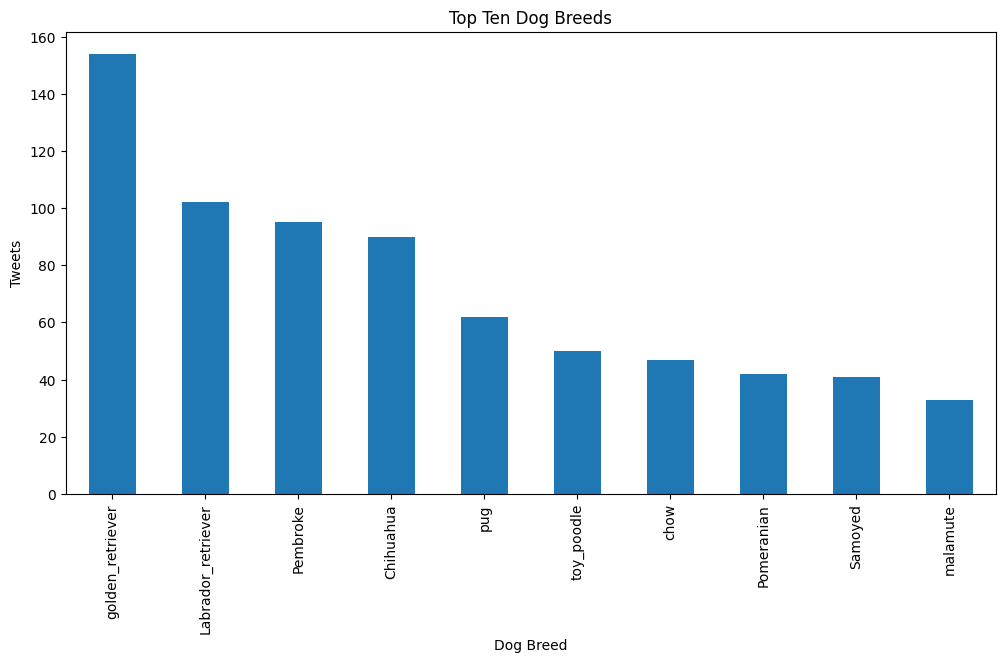

In [259]:
# draw plot of top ten dog breeds and their number of tweets
topTenDogs.plot.bar(title='Top Ten Dog Breeds', ylabel='Tweets', xlabel='Dog Breed', figsize=(12,6))

Text(0.5, 1.0, 'Dog Ratings vs Retweet Count')

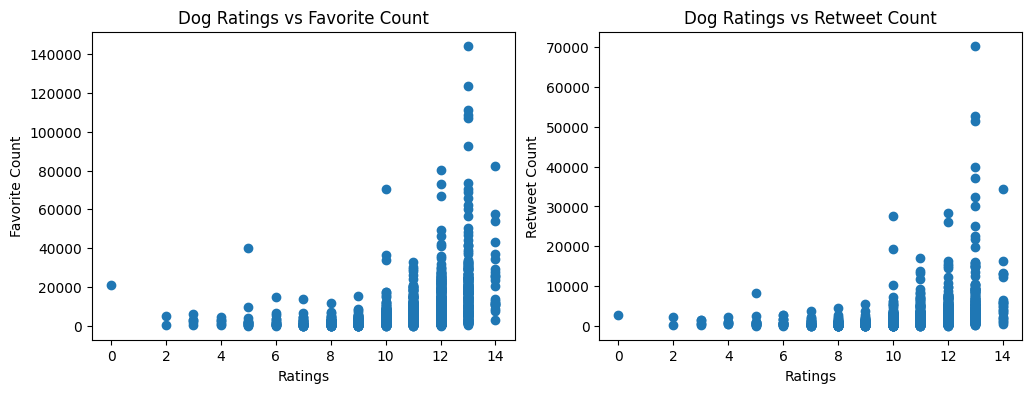

In [261]:
# draw the plot of dog rating vs favorite_count and the plot of dog rating vs retweet_count side by side
fig = plt.figure(figsize=(12,4))

plt1 = fig.add_subplot(1,2,1)
plt1.scatter(x=allDf[allDf.rating_numerator < 20].rating_numerator, y=allDf[allDf.rating_numerator < 20].favorite_count)
plt1.set_xlabel('Ratings')
plt1.set_ylabel('Favorite Count')
plt1.set_title('Dog Ratings vs Favorite Count')

plt2 = fig.add_subplot(1,2,2)
plt2.scatter(x=allDf[allDf.rating_numerator < 20].rating_numerator, y=allDf[allDf.rating_numerator < 20].retweet_count)
plt2.set_xlabel('Ratings')
plt2.set_ylabel('Retweet Count')
plt2.set_title('Dog Ratings vs Retweet Count')